In [11]:
from SimuSamp.src.SimuSamp.new_funcs.load.SpatDat import SpatDat
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
parent_filepath = "C:/Users/Michael/Desktop/block_data"
sampleids = ["01_F", "01_G", "02_G", "02_H", "03_B", "03_H", "04_I", "04_N", "05_G", "05_I", "06_H", "07_K", "08_J", "09_E", "10_B", "11_E", "11_F", "12_M", "13_G", "14_I", "15_G", "16_B", "17_I", "18_E", "19_F", "21_I", "22_N", "23_B", "24_I", "25_M", "26_I", "27_H", "28_FSC", "29_L", "30_D"]

In [ ]:
# cells = gpd.sjoin(spatdat.object_data, spatdat.annotation_data, predicate="within")

### Calculate Mean Density in Top and Bottom Tertile per Sampleid

In [3]:
sampleid_list = []
min_list = []
max_list = []
for sampleid in sampleids:
    spatdat = SpatDat(sampleid=sampleid, parent_filepath=parent_filepath)
    spatdat.compute_fields(width_microns=300)

    hpfs = spatdat.hpfs.sort_values("density").reset_index(drop=True)
    min_hpf = hpfs.iloc[:len(hpfs) // 3]["density"].mean()
    max_hpf = hpfs.iloc[-len(hpfs) // 3:]["density"].mean()

    sampleid_list.append(sampleid)
    min_list.append(min_hpf)
    max_list.append(max_hpf)

results = pd.DataFrame({"sampleid": sampleid_list, "mean_bottom": min_list, "mean_top": max_list})
results

,sampleid,mean_bottom,mean_top
0,01_F,311.249739,1392.295520
1,01_G,3.396343,582.168411
2,02_G,397.736308,1731.960410
3,02_H,170.019900,747.408057
4,03_B,0.000000,444.468845
5,03_H,27.254009,587.565365
6,04_I,106.598958,823.814780
7,04_N,100.662989,913.185303
8,05_G,171.682277,1564.396521
9,05_I,93.253766,1735.786383


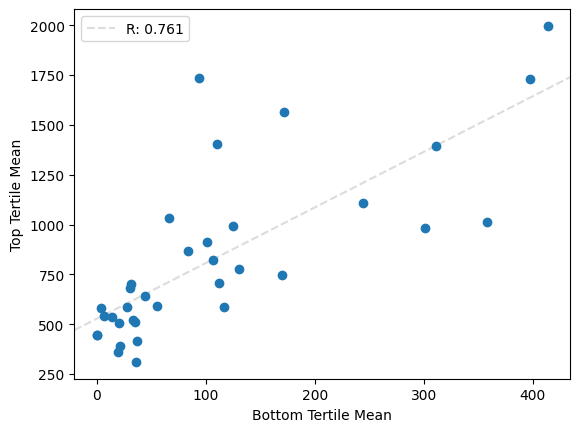

In [22]:
plt.scatter(results["mean_bottom"], results["mean_top"])
plt.xlabel("Bottom Tertile Mean")
plt.ylabel("Top Tertile Mean")

slope, intercept, r_value, p_value, std_err = stats.linregress(results["mean_bottom"], results["mean_top"])

plt.gca().axline((0, intercept), slope=slope, color="gainsboro", linestyle="--", zorder=0, label=f"R: {round(r_value, 3)}")
plt.gca().legend()
